In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv('/content/drive/MyDrive/winequality-red.csv')
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
data.shape

(1599, 12)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [6]:
null_data = data.isnull().sum()
print(null_data[null_data>0])


Series([], dtype: int64)


In [7]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


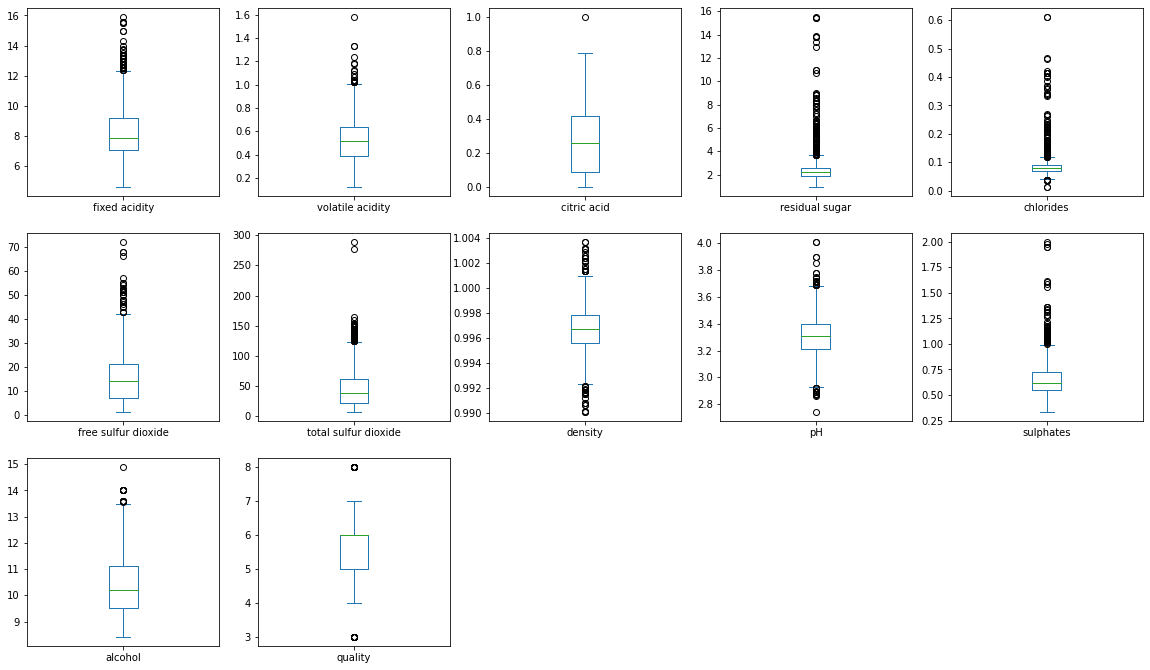

In [8]:
data.plot(kind='box', subplots=True, layout=(5,5), figsize=(20,20))
plt.show()

<Axes: >

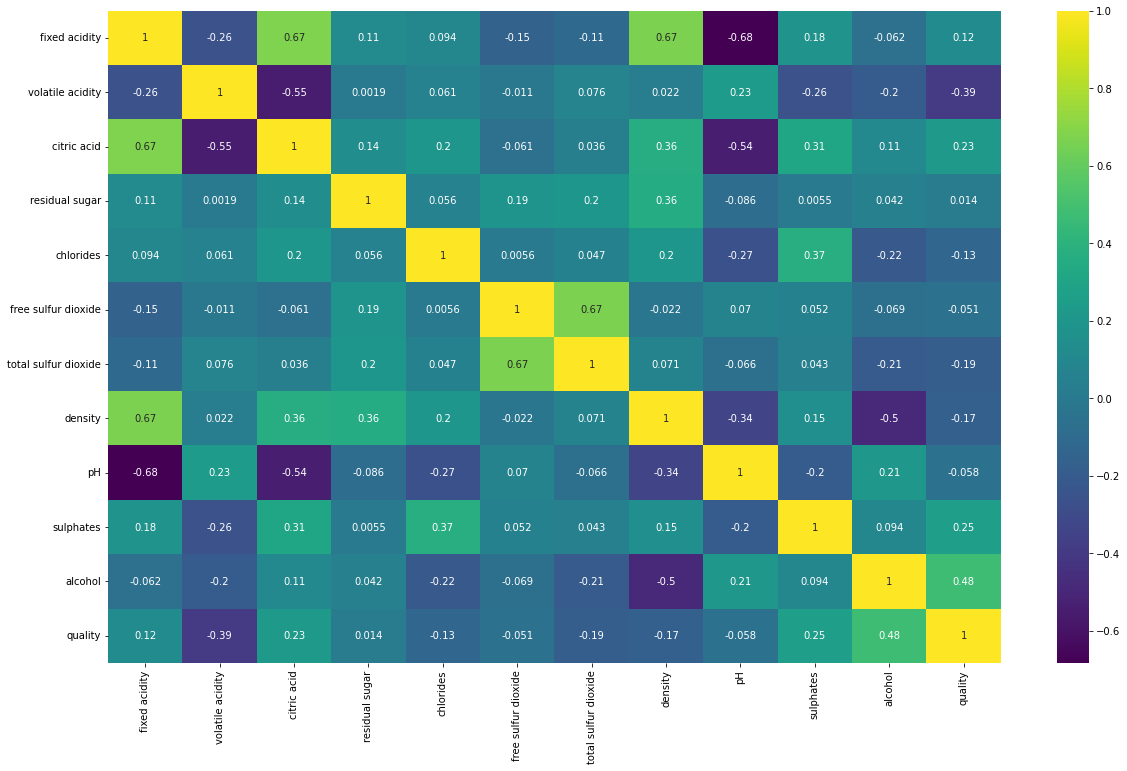

In [9]:
plt.subplots(figsize=(20,12))
sns.heatmap(data.corr(),annot = True,cmap = 'viridis')

<Axes: >

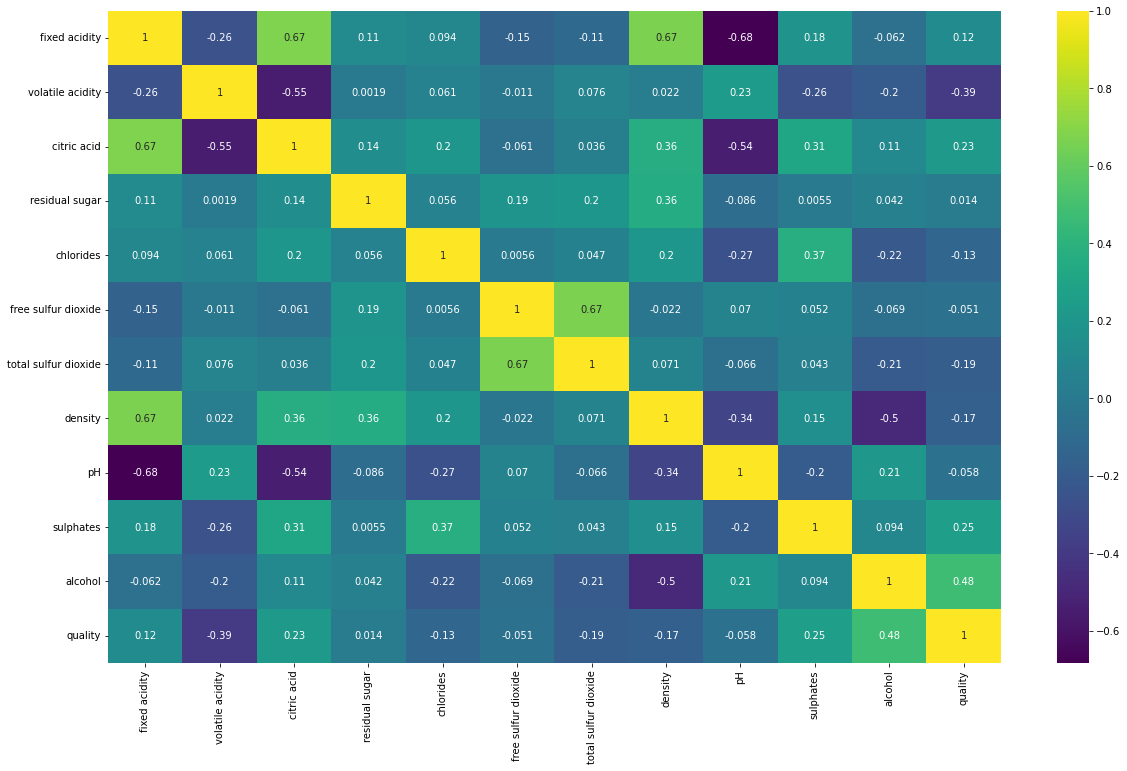

In [10]:
plt.subplots(figsize=(20,12))
sns.heatmap(data.corr(),annot = True,cmap = 'viridis')

<Axes: xlabel='quality', ylabel='count'>

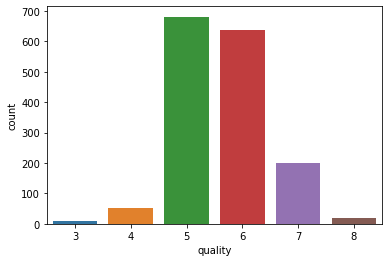

In [11]:
sns.countplot(data,x='quality')

In [12]:
X = data.drop(['quality'], axis=1)
y = data['quality']
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=0)

In [13]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
train_pred = model.predict(X_train)
test_pred = model.predict(X_test)
from sklearn.metrics import accuracy_score
print('Training Score:', accuracy_score(y_train,train_pred))
print('Testing Score:', accuracy_score(y_test, test_pred))

Training Score: 1.0
Testing Score: 0.684375


In [15]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(solver = 'liblinear')
logreg.fit(X_train,y_train)

LogisticRegression(solver='liblinear')

<BarContainer object of 11 artists>

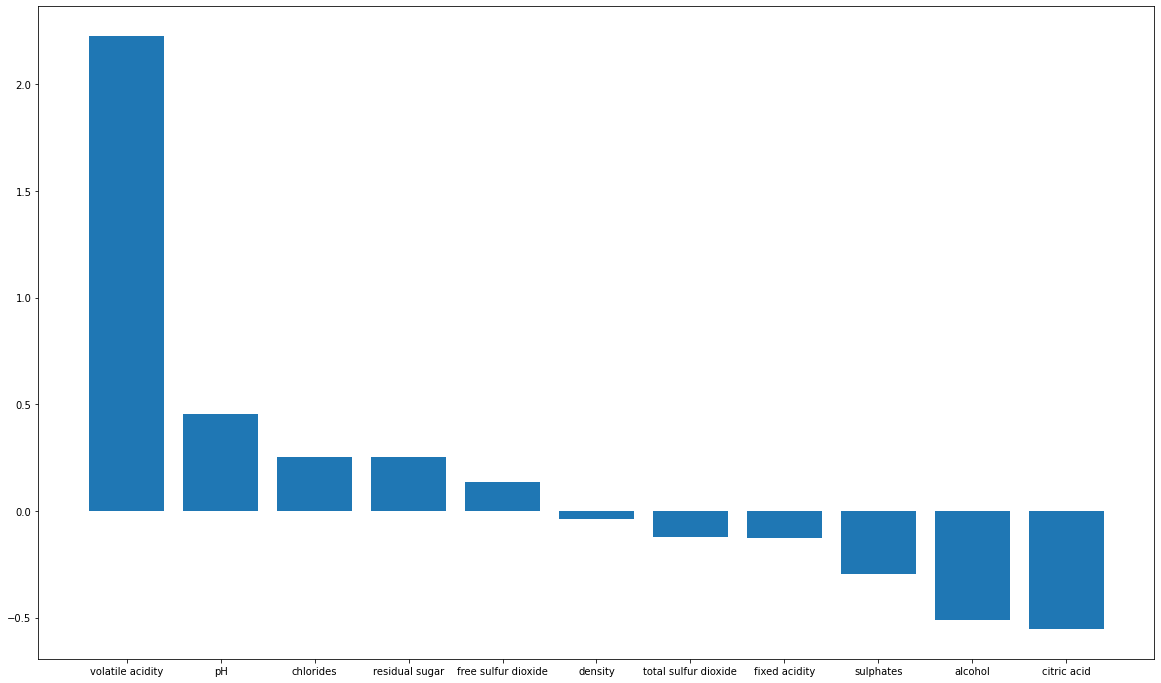

In [16]:
importances = pd.DataFrame(data={'Attribute': X.columns,'importance': logreg.coef_[0]})
importances = importances.sort_values(by = 'importance',ascending = False)
fig,ax = plt.subplots(figsize = (20,12))
plt.bar(x = importances['Attribute'],height = importances['importance'])

In [17]:
importances

,Attribute,importance
1,volatile acidity,2.226119
8,pH,0.453691
4,chlorides,0.251564
3,residual sugar,0.251141
5,free sulfur dioxide,0.135532
7,density,-0.036619
6,total sulfur dioxide,-0.122825
0,fixed acidity,-0.124942
9,sulphates,-0.297810
10,alcohol,-0.512804


In [18]:
importances[(importances['importance']<=-0.5)]

,Attribute,importance
10,alcohol,-0.512804
2,citric acid,-0.554117


In [19]:
importances[(importances['importance']>=0.5)]

,Attribute,importance
1,volatile acidity,2.226119


In [20]:
features = ['alcohol','volatile acidity','pH']


In [21]:
x = data[features]
y = data[['quality']]
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 0)

In [22]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(x_train,y_train)
train_pred = model.predict(x_train)
test_pred = model.predict(x_test)
from sklearn.metrics import accuracy_score
print('Training Score : ', accuracy_score(y_train,train_pred))
print('Testing Score : ',accuracy_score(y_test,test_pred))

Training Score :  0.9976544175136826
Testing Score :  0.590625


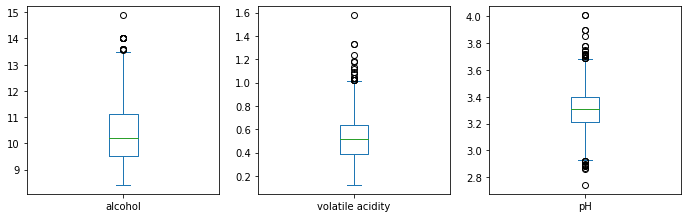

In [23]:
data[features].plot(kind='box',subplots = True,layout = (5,5),figsize = (20,20))
plt.show()

In [24]:
Outliers = []
for colname in features:
    col = data[colname]
    Q1 = np.quantile(col,0.25)
    Q3 = np.quantile(col,0.75)
    IQR = Q3-Q1
    lower = Q1 - 1.5*IQR
    upper = Q3 + 1.5*IQR
    for i in col:
        if (i<lower or i>upper):
            Outliers.append(i)
    print(colname)
    print(Outliers)
    for x in Outliers:
        data.drop(data[(data[colname]==x)].index,inplace = True)
    


alcohol
[14.0, 14.0, 14.0, 14.0, 14.9, 14.0, 13.6, 13.6, 13.6, 14.0, 14.0, 13.566666666666698, 13.6]
volatile acidity
[14.0, 14.0, 14.0, 14.0, 14.9, 14.0, 13.6, 13.6, 13.6, 14.0, 14.0, 13.566666666666698, 13.6, 1.13, 1.02, 1.07, 1.33, 1.33, 1.04, 1.09, 1.04, 1.24, 1.185, 1.02, 1.035, 1.025, 1.115, 1.02, 1.02, 1.58, 1.18, 1.04]
pH
[14.0, 14.0, 14.0, 14.0, 14.9, 14.0, 13.6, 13.6, 13.6, 14.0, 14.0, 13.566666666666698, 13.6, 1.13, 1.02, 1.07, 1.33, 1.33, 1.04, 1.09, 1.04, 1.24, 1.185, 1.02, 1.035, 1.025, 1.115, 1.02, 1.02, 1.58, 1.18, 1.04, 3.9, 3.85, 2.74, 3.69, 3.69, 2.88, 2.86, 2.92, 2.92, 2.92, 2.87, 2.89, 2.89, 2.92, 3.9, 3.69, 3.69, 3.71, 3.71, 2.89, 2.89, 3.78, 3.78, 4.01, 2.9, 4.01, 3.71, 2.88, 3.72, 3.72]


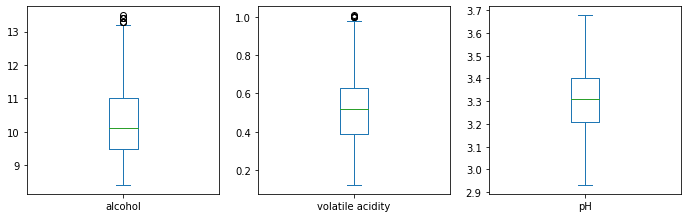

In [25]:
data[features].plot(kind='box',subplots = True,layout = (5,5),figsize = (20,20))
plt.show()

In [26]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(x_train,y_train)
train_pred = model.predict(x_train)
test_pred = model.predict(x_test)
from sklearn.metrics import accuracy_score
print('Training Score : ', accuracy_score(y_train,train_pred))
print('Testing Score : ',accuracy_score(y_test,test_pred))

Training Score :  0.9976544175136826
Testing Score :  0.6


In [27]:
features.append('quality')

<Axes: >

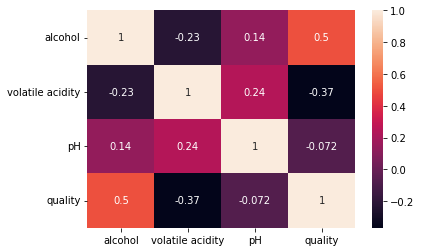

In [28]:
sns.heatmap(data[features].corr(),annot = True)

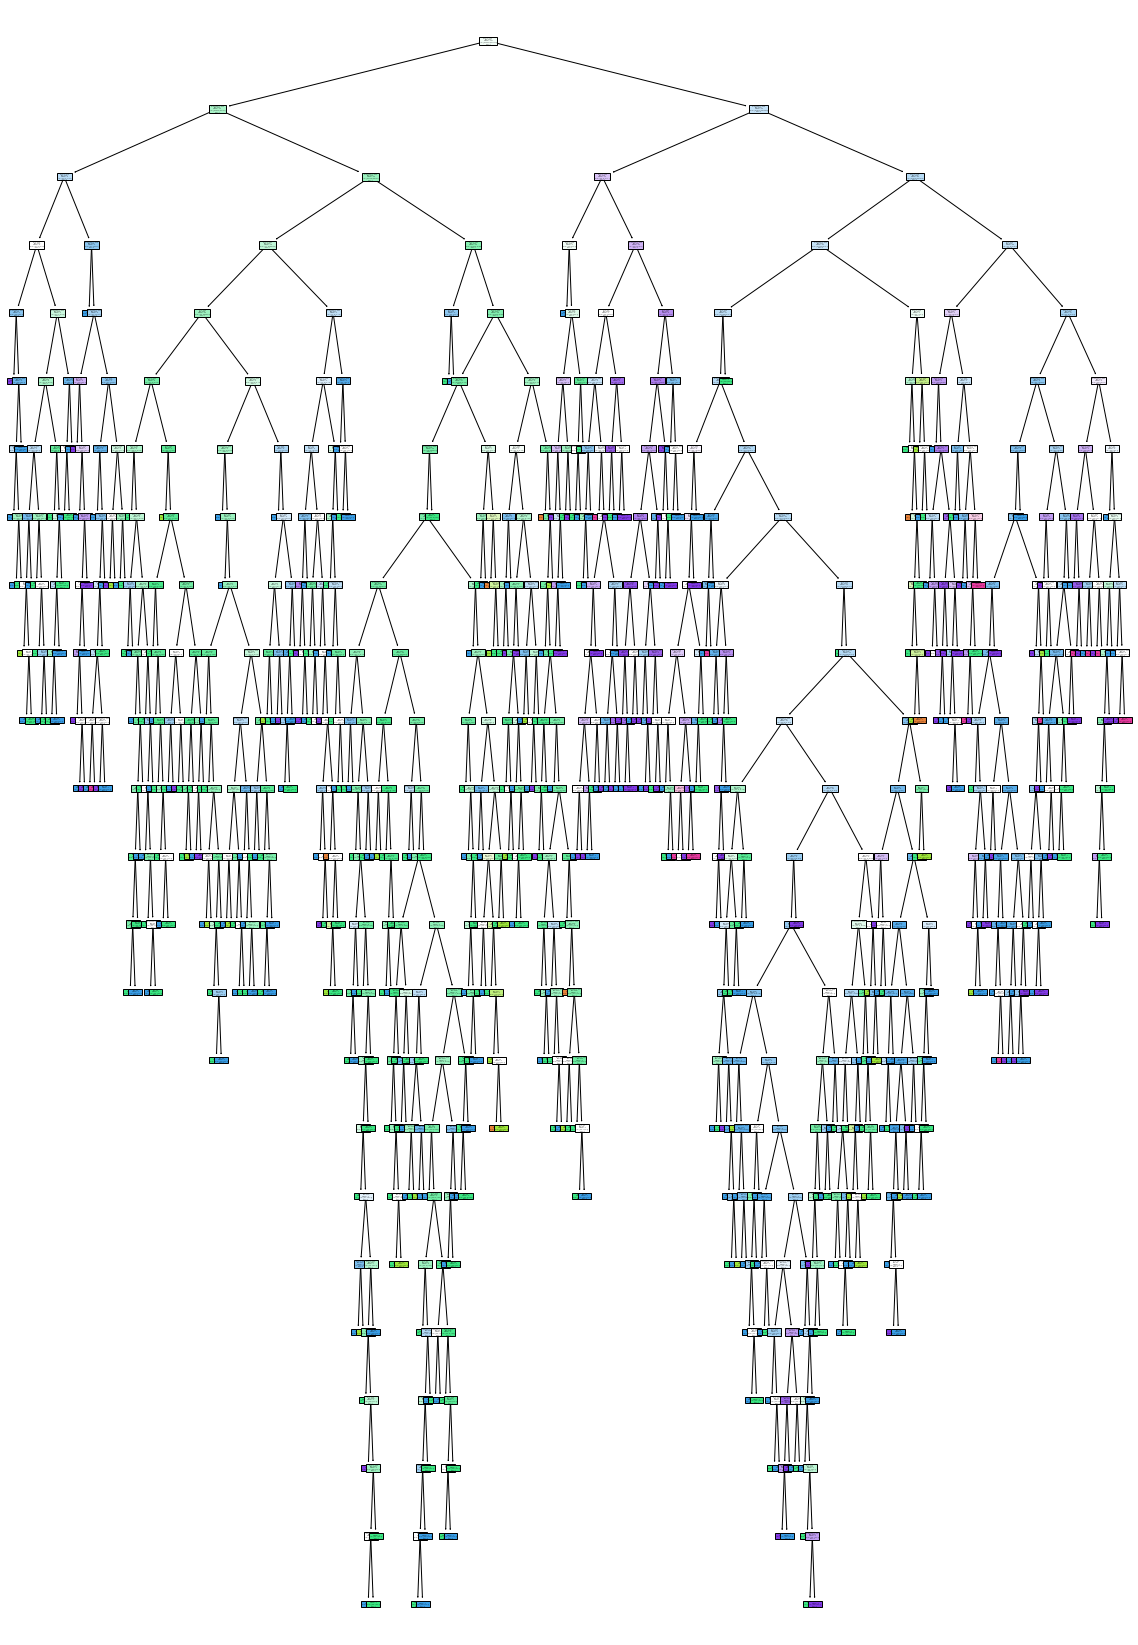

In [29]:
from sklearn import tree 
plt.subplots(figsize=(20,30))
classes = list(str(data.quality.value_counts().sort_index().index))
tree.plot_tree(model,feature_names=features,class_names=classes,filled=True)
plt.show()

In [30]:
path = model.cost_complexity_pruning_path(x_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities
print(ccp_alphas)

[0.         0.00023456 0.00026062 0.00037316 0.0004778  0.00048866
 0.00048866 0.00049058 0.00049381 0.00050788 0.00052124 0.00052124
 0.00052124 0.00052124 0.00052124 0.00052124 0.00052124 0.0005864
 0.0005864  0.0005864  0.0005864  0.0005864  0.0005864  0.00061432
 0.00062549 0.00062549 0.00062549 0.00062549 0.00062549 0.00062549
 0.00065155 0.00065155 0.00065155 0.00065155 0.00065698 0.00066095
 0.00067017 0.00067017 0.00068413 0.00069499 0.00069499 0.00069499
 0.00069499 0.00069719 0.00069956 0.00070367 0.00070367 0.00071078
 0.00071078 0.00071671 0.00072172 0.00072172 0.00072172 0.00072601
 0.00072797 0.00073299 0.00073718 0.00073842 0.00074613 0.00078186
 0.00078186 0.00078186 0.00078186 0.00078186 0.00078186 0.00078186
 0.00078186 0.00078186 0.00078186 0.00078186 0.00078186 0.00078186
 0.00078186 0.00078186 0.00078186 0.00078186 0.00078186 0.00078186
 0.00078186 0.00078186 0.00078186 0.00078186 0.00078186 0.00080823
 0.00081082 0.00083398 0.00083398 0.00083398 0.00083398 0.00083

In [31]:
models = []
for ccp_alpha in ccp_alphas:
    model = tree.DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    model.fit(x_train, y_train)
    models.append(model)

In [35]:
train_score = np.array([i.score(x_train,y_train) for i in models])
test_score = np.array([i.score(x_test,y_test) for i in models])
score_df = pd.DataFrame(data = [models,train_score.T,test_score.T]).transpose()
score_df.columns = ['model','train score','test score']
score_df.head()

,model,train score,test score
0,DecisionTreeClassifier(random_state=0),0.997654,0.5875
1,DecisionTreeClassifier(ccp_alpha=0.00023455824...,0.997654,0.5875
2,DecisionTreeClassifier(ccp_alpha=0.00026062027...,0.997654,0.5875
3,DecisionTreeClassifier(ccp_alpha=0.00037316085...,0.996873,0.5875
4,DecisionTreeClassifier(ccp_alpha=0.00047780383...,0.996091,0.584375


In [36]:
pruned = score_df[(score_df['train score'] <= score_df['test score'])]
pruned

,model,train score,test score
236,DecisionTreeClassifier(ccp_alpha=0.01345475968...,0.548866,0.59375


In [37]:
pruned.iloc[0,0]


DecisionTreeClassifier(ccp_alpha=0.013454759684123907, random_state=0)

In [38]:
pruned = score_df[(score_df['train score'] >= score_df['test score'])]
pruned = pruned.sort_values(by = 'train score',ascending = True)

In [39]:
pruned.iloc[:10]

,model,train score,test score
237,DecisionTreeClassifier(ccp_alpha=0.05914139208...,0.426896,0.421875
235,DecisionTreeClassifier(ccp_alpha=0.01159692222...,0.568413,0.5625
233,DecisionTreeClassifier(ccp_alpha=0.00519688273...,0.584832,0.578125
234,DecisionTreeClassifier(ccp_alpha=0.00773031902...,0.584832,0.578125
232,DecisionTreeClassifier(ccp_alpha=0.00476670996...,0.594996,0.590625
231,DecisionTreeClassifier(ccp_alpha=0.00378945291...,0.599687,0.590625
229,DecisionTreeClassifier(ccp_alpha=0.00321007336...,0.604378,0.590625
228,DecisionTreeClassifier(ccp_alpha=0.00318760903...,0.604378,0.590625
230,DecisionTreeClassifier(ccp_alpha=0.00344613216...,0.604378,0.590625
227,DecisionTreeClassifier(ccp_alpha=0.00304780679...,0.610633,0.571875


In [40]:
pruned.iloc[0,0]


DecisionTreeClassifier(ccp_alpha=0.05914139208812497, random_state=0)

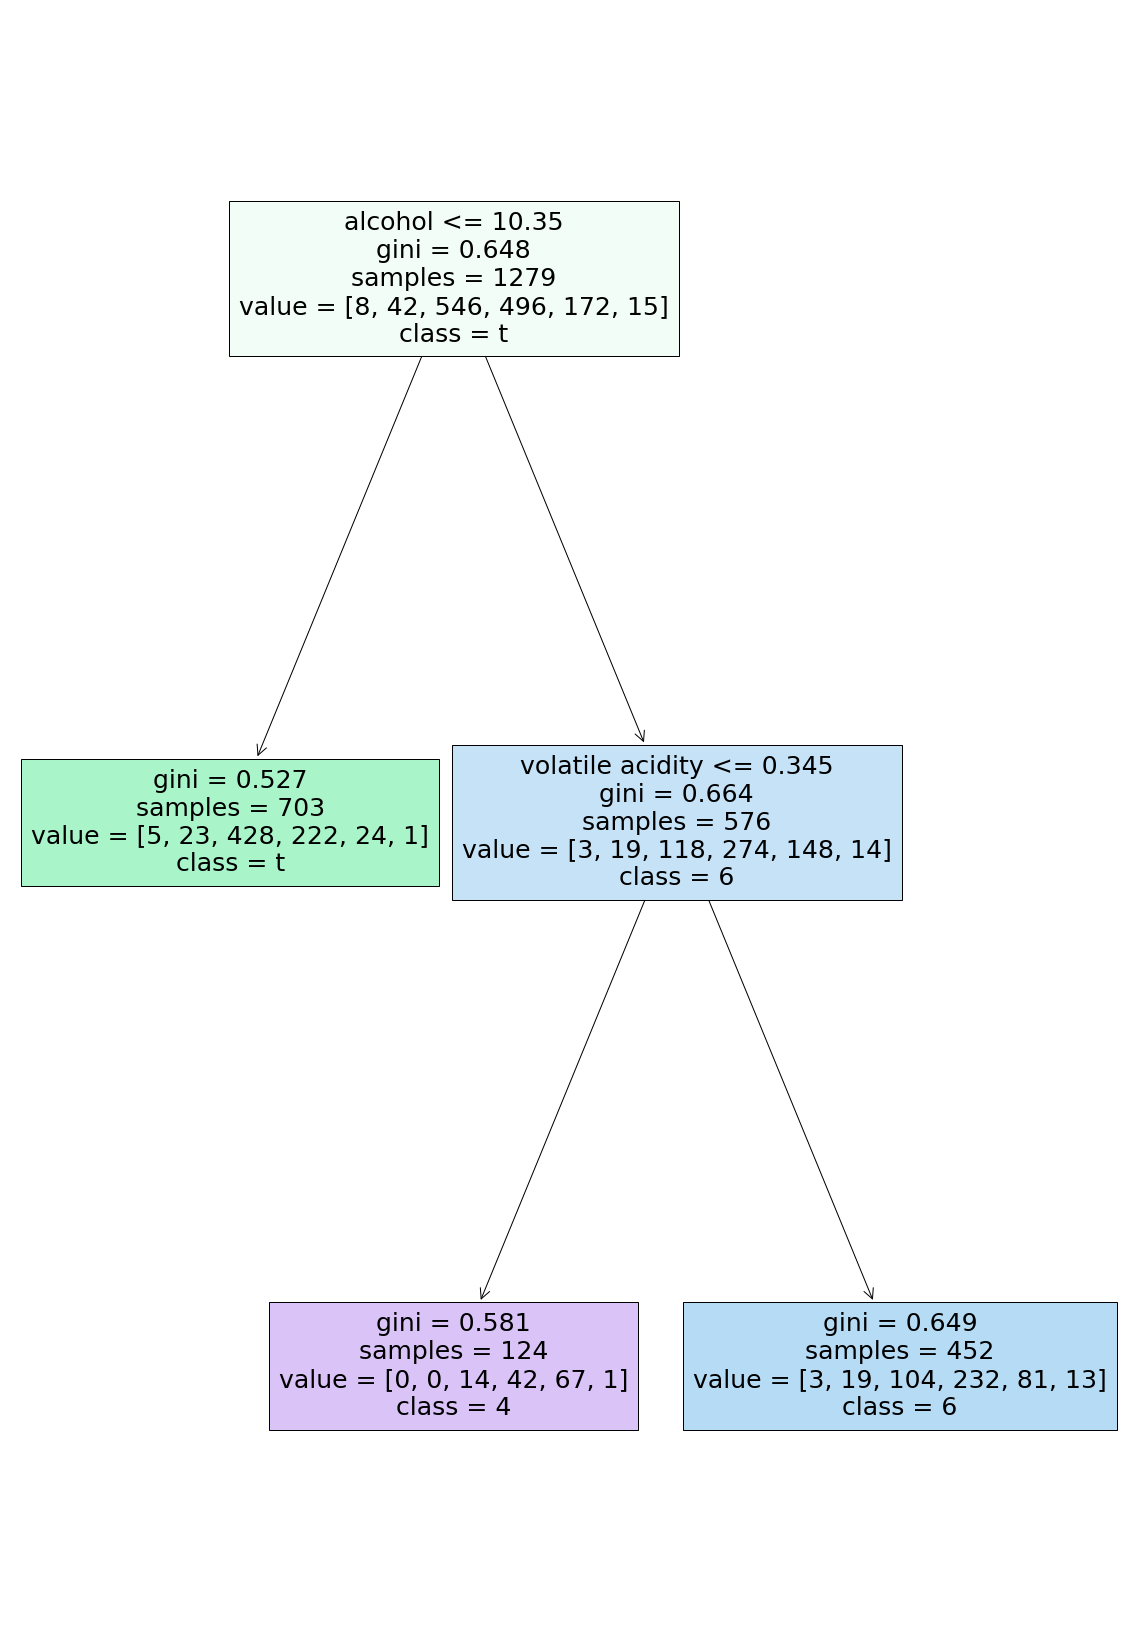

In [41]:
from sklearn import tree 
plt.subplots(figsize=(20,30))
model1 = DecisionTreeClassifier(ccp_alpha = 0.01159692222006048, random_state = 0)
model1.fit(x_train,y_train)
classes = list(str(data.quality.value_counts().sort_index().index))
tree.plot_tree(model1,feature_names=features,class_names=classes,filled=True)
plt.show()

In [42]:
model1.score(x_train,y_train)

0.5684128225175918

In [43]:
model1.score(x_test,y_test)

0.5625

In [44]:
y_pred = model1.predict(x_test)
accuracy_score(y_test,y_pred)

0.5625

In [45]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)


array([[  0,   0,   2,   0,   0,   0],
       [  0,   0,   7,   3,   1,   0],
       [  0,   0, 104,  25,   6,   0],
       [  0,   0,  56,  66,  20,   0],
       [  0,   0,   2,  15,  10,   0],
       [  0,   0,   1,   0,   2,   0]])